In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


pd.set_option("display.max_columns",30)

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe(include ='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [8]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64


According to studies, since men are more likely to have a heart attack than women, the probability of 1 and 0 is adjusted as 1 = female 0 = male.

In [9]:
df.loc[(df['sex'] ==1), 'sex'] = 'Male'
df.loc[(df['sex'] ==0), 'sex'] = 'Female'

In [10]:
df.loc[(df['output'] ==1), 'output'] = 'High'
df.loc[(df['output'] ==0), 'output'] = 'Low'

Text(0.5, 1.0, 'Gender distribution')

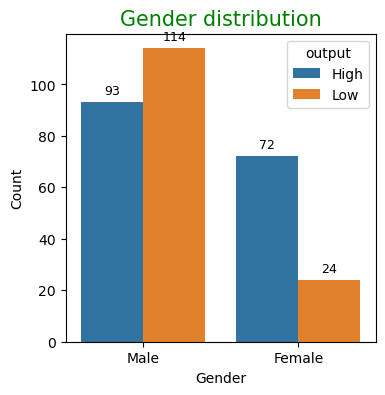

In [11]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df['sex'], order=df['sex'].value_counts().index, hue=df['output'])

for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender distribution",color = 'green',fontsize = 15)

Text(0.5, 1.0, 'Chest Pain type distribution')

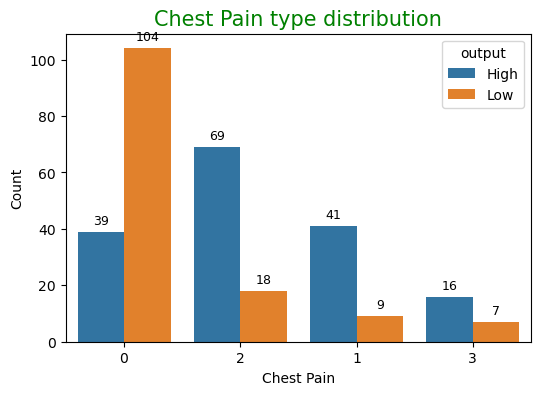

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['cp'], order=df['cp'].value_counts().index, hue=df['output'])

for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.title("Chest Pain type distribution",color = 'green',fontsize = 15)

Text(0.5, 1.0, 'FBS type distribution(>120 mg/dl)')

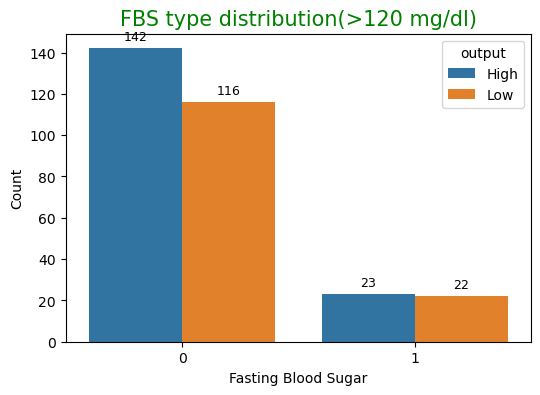

In [13]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['fbs'], order=df['fbs'].value_counts().index, hue=df['output'])

for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title("FBS type distribution(>120 mg/dl)",color = 'green',fontsize = 15)

Text(0.5, 1.0, 'Exercise induced angina type')

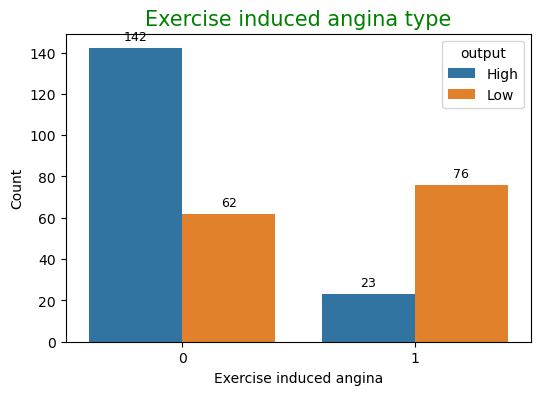

In [14]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['exng'], order=df['exng'].value_counts().index, hue=df['output'])

for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('Exercise induced angina')
plt.ylabel('Count')
plt.title("Exercise induced angina type",color = 'green',fontsize = 15)

Text(0.5, 1.0, 'Rest type')

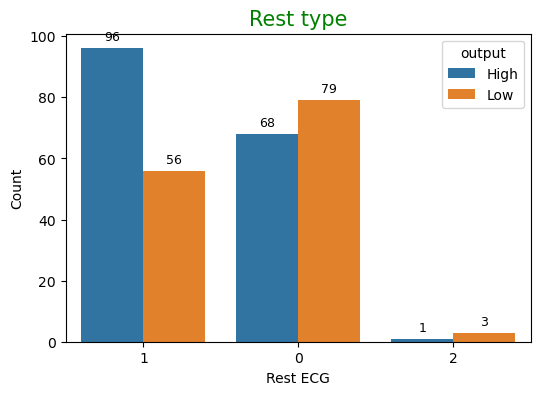

In [15]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['restecg'], order=df['restecg'].value_counts().index, hue=df['output'])

for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('Rest ECG')
plt.ylabel('Count')
plt.title("Rest type",color = 'green',fontsize = 15)

Text(0.5, 1.0, 'Slope type')

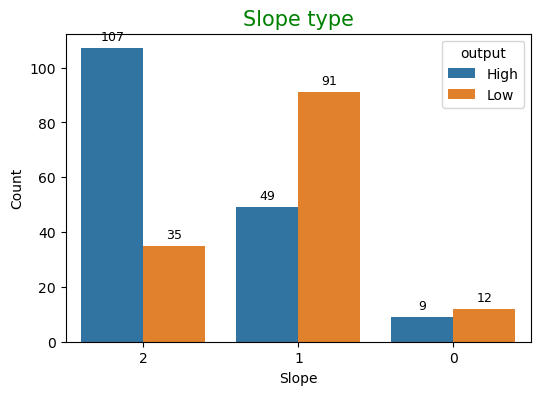

In [21]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['slp'], order=df['slp'].value_counts().index, hue=df['output'])

for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('Slope')
plt.ylabel('Count')
plt.title("Slope type",color = 'green',fontsize = 15)

Text(0.5, 1.0, 'thall type')

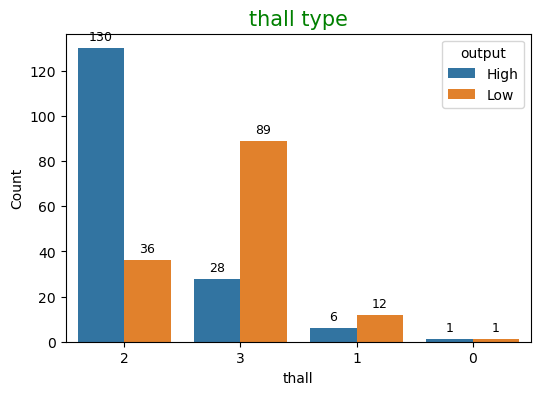

In [22]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['thall'], order=df['thall'].value_counts().index, hue=df['output'])

for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('thall')
plt.ylabel('Count')
plt.title("thall type",color = 'green',fontsize = 15)

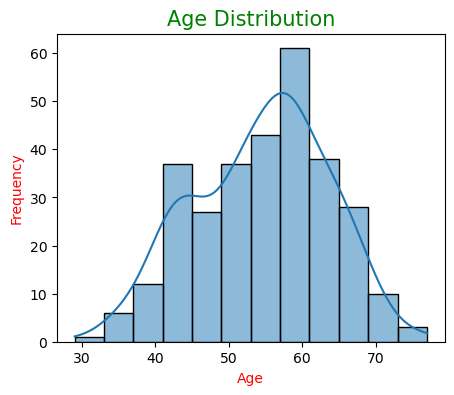

In [16]:
plt.figure(figsize=(5,4))
sns.histplot(data=df['age'], kde=True)
plt.xlabel('Age',color='red')
plt.ylabel('Frequency',color='red')
plt.title("Age Distribution",color = 'green',fontsize = 15)
plt.show()

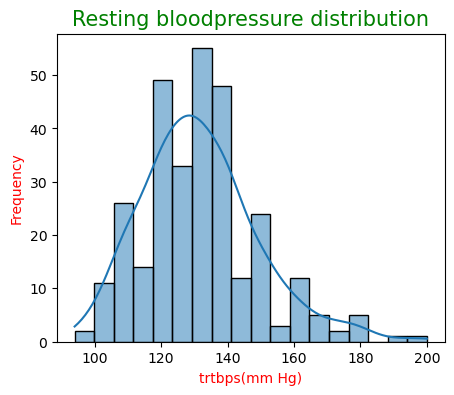

In [17]:
plt.figure(figsize=(5,4))
sns.histplot(data=df['trtbps'], kde=True)
plt.xlabel('trtbps(mm Hg)',color='red')
plt.ylabel('Frequency',color='red')
plt.title("Resting bloodpressure distribution",color = 'green',fontsize = 15)
plt.show()

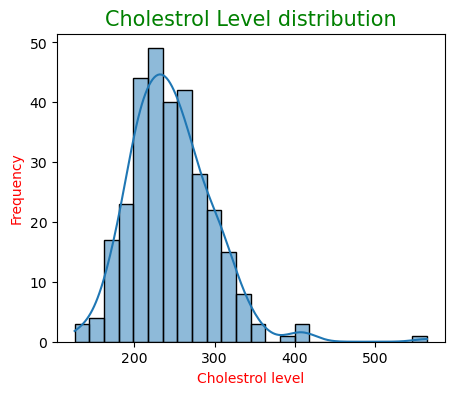

In [18]:
plt.figure(figsize=(5,4))
sns.histplot(data=df['chol'], kde=True)
plt.xlabel('Cholestrol level',color='red')
plt.ylabel('Frequency',color='red')
plt.title("Cholestrol Level distribution",color = 'green',fontsize = 15)
plt.show()

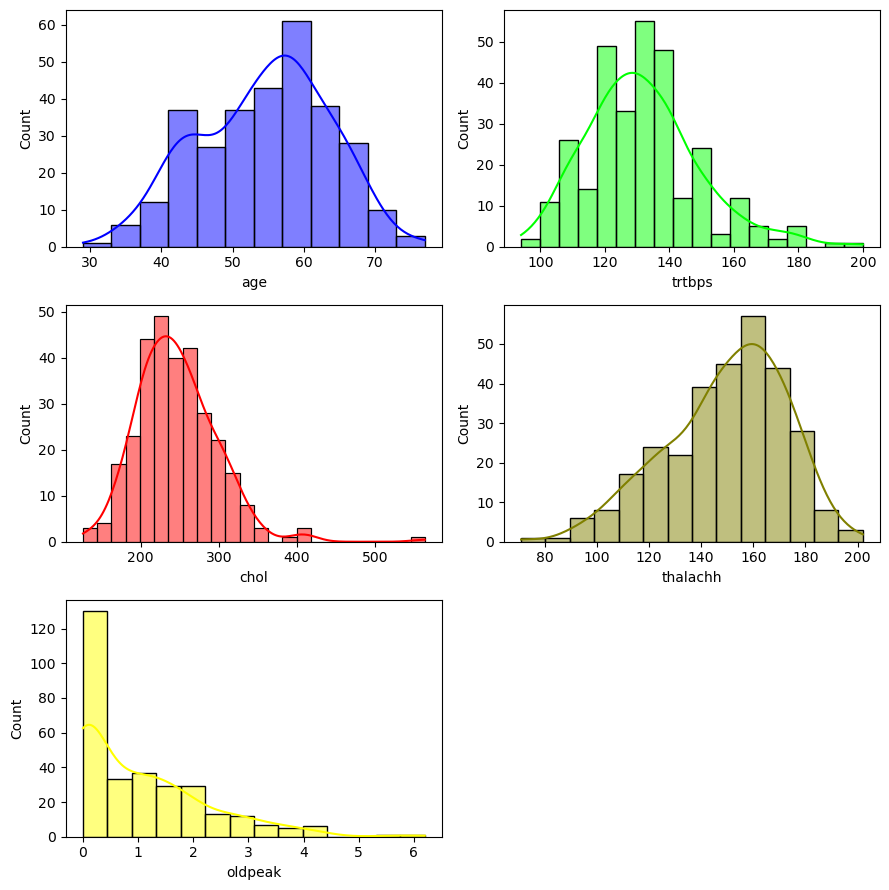

In [19]:
fig = plt.figure(figsize =(9,9))

plt.subplot(3,2,1)
sns.histplot(df['age'], kde=True, color ='blue')

plt.subplot(3,2,2)
sns.histplot(df['trtbps'], kde=True, color ='lime')

plt.subplot(3,2,3)
sns.histplot(df['chol'], kde=True, color ='red')

plt.subplot(3,2,4)
sns.histplot(df['thalachh'], kde=True, color ='olive')

plt.subplot(3,2,5)
sns.histplot(df['oldpeak'], kde=True, color ='yellow')

fig.tight_layout()
plt.show()

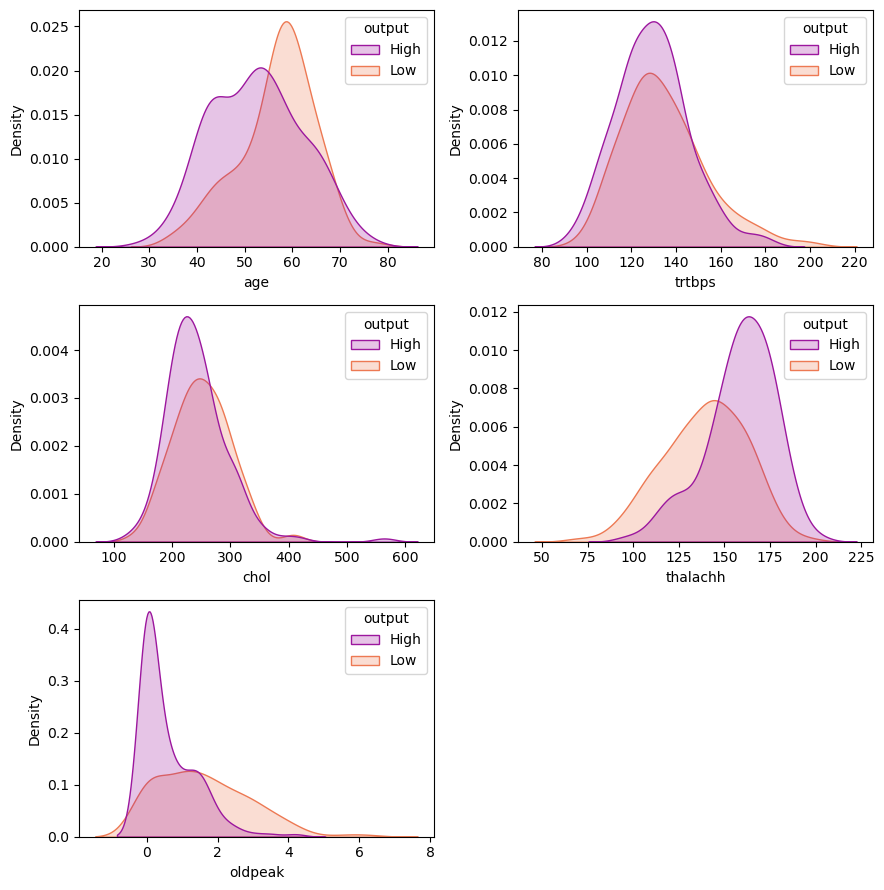

In [20]:
fig = plt.figure(figsize =(9,9))

plt.subplot(3,2,1)
sns.kdeplot(data=df, x='age', shade=True, palette ='plasma',hue='output')

plt.subplot(3,2,2)
sns.kdeplot(data =df, x='trtbps', shade=True, palette ='plasma',hue='output')

plt.subplot(3,2,3)
sns.kdeplot(data = df, x='chol', shade=True, palette ='plasma',hue='output')

plt.subplot(3,2,4)
sns.kdeplot(data = df,x='thalachh', shade=True, palette ='plasma',hue='output')

plt.subplot(3,2,5)
sns.kdeplot(data = df,x='oldpeak', shade=True, palette ='plasma',hue='output')

fig.tight_layout()
plt.show()